# Hubble Diagram

In [22]:
from astropy.io import ascii
import numpy as np

In [5]:
%matplotlib inline
from matplotlib import pyplot

In [59]:
tbdata = ascii.read('hubble_data.dat')

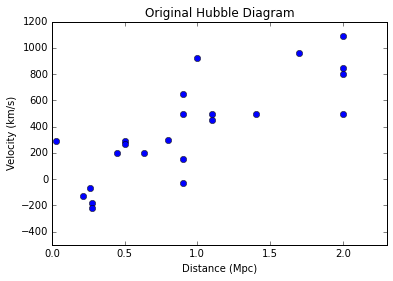

In [172]:
pyplot.plot(tbdata['D'], tbdata['V'], 'o')
pyplot.xlim(0, 2.3)
pyplot.ylim(-500, 1200)
pyplot.xlabel('Distance (Mpc)')
pyplot.ylabel('Velocity (km/s)')
pyplot.title('Original Hubble Diagram')
pyplot.savefig('original_hubble.pdf')

In [63]:
tbdata['D'].std()

0.61798085140497161

In [64]:
tbdata['V'].std()

368.72500395880866

## Normalize

In [65]:
norm_dist = (tbdata['D'] - tbdata['D'].mean())/tbdata['D'].std()
norm_vel = (tbdata['V'] - tbdata['V'].mean())/tbdata['V'].std()

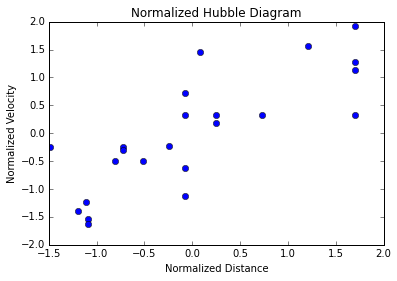

In [174]:
pyplot.plot(norm_dist.T, norm_vel.T, 'o')
#pyplot.xlim(-0.24, -0.17)
pyplot.xlabel('Normalized Distance')
pyplot.ylabel('Normalized Velocity')
pyplot.title('Normalized Hubble Diagram')
pyplot.savefig('norm_hubble.pdf')

In [69]:
print(norm_dist.std())
print(norm_vel.std())

1.0
1.0


### Calculate Covariance Matrix

In [70]:
cov_matrix = np.cov(np.matrix([norm_dist, norm_vel]))
print(cov_matrix)
print(cov_matrix[0,0]+cov_matrix[1,1])

[[ 1.04545455  0.83109628]
 [ 0.83109628  1.04545455]]
2.09090909091


### Calculate principal components

In [71]:
sigma,principal_comp = np.linalg.eig(cov_matrix)

##Check: Sum variance matches sum of variance of original matrix

In [72]:
print(sigma.sum()) 
print(sigma)

2.09090909091
[ 1.87655083  0.21435827]


In [73]:
print(principal_comp)

[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


##Check principal comp matrix diagonalizes data

In [74]:
print(np.matrix(principal_comp).T * np.matrix(cov_matrix)* np.matrix(principal_comp))

[[  1.87655083e+00  -1.11022302e-16]
 [ -1.38777878e-16   2.14358266e-01]]


### Convert to principal coordinates then back to original data with reduced component list

In [84]:
norm_data = np.matrix(np.array([norm_dist, norm_vel])).T
principal_comp = np.matrix(principal_comp)
pc_data = norm_data*principal_comp


1.33976179184 0.452811595607


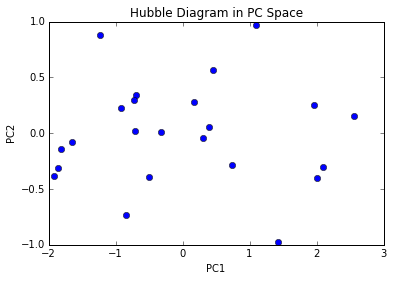

In [175]:
pyplot.plot(pc_data[:,0], pc_data[:,1], 'o')
print(pc_data[:,0].std(), pc_data[:,1].std())
pyplot.xlabel('PC1')
pyplot.ylabel('PC2')
pyplot.title('Data rotated to Principal Component Frame')
pyplot.title('Hubble Diagram in PC Space')
pyplot.savefig('pc_space_hubble.pdf')

In [152]:
remove_pc2 = principal_comp.copy()
remove_pc2[:, 1] = 0
clean_data = pc_data * remove_pc2.T

In [153]:
remove_pc2

matrix([[ 0.70710678,  0.        ],
        [ 0.70710678,  0.        ]])

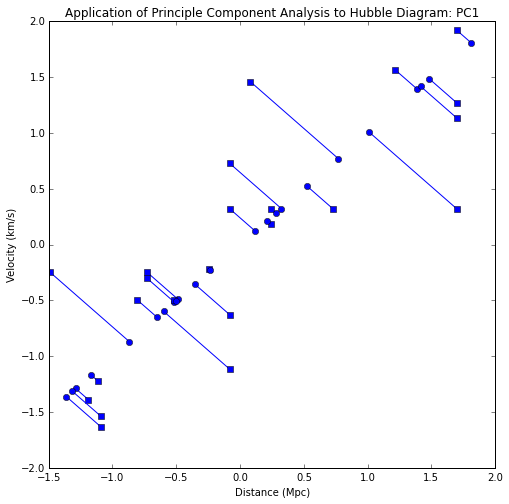

In [170]:
fig = pyplot.figure(figsize = [8, 8])
for i in range(23):
    pyplot.plot([clean_data[i, 0], norm_dist.T[i]], [clean_data[i, 1], norm_vel.T[i]], ls = '-', color = 'b', label = 'PCA Cleaned Data')
    pyplot.plot(norm_dist.T[i],norm_vel.T[i], 's', color = 'b', label = 'Original Data')
    pyplot.plot(clean_data[i, 0], clean_data[i, 1], marker = 'o', color = 'b', label = 'PCA Cleaned Data')

pyplot.xlabel('Distance (Mpc)')
pyplot.ylabel('Velocity (km/s)')
pyplot.title('Application of Principle Component Analysis to Hubble Diagram: PC1')
pyplot.savefig('original_pc1.pdf')

In [146]:
clean_data.std()

0.94735464818719461

In [147]:
remove_pc1 = principal_comp.copy()
remove_pc1[:, 0] = 0
clean_data2 = pc_data * remove_pc1.T

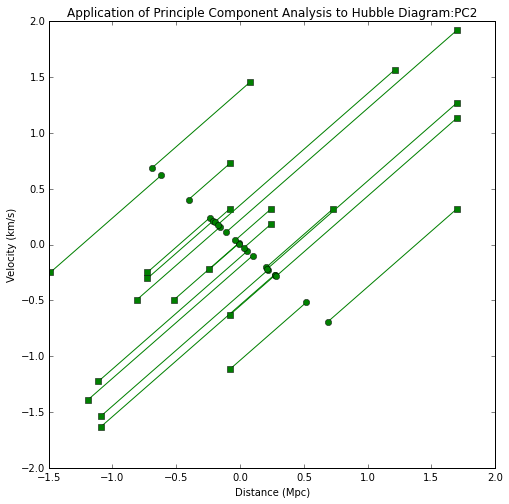

In [171]:
fig = pyplot.figure(figsize = [8, 8])
colors = ['r', 'orange', 'y', 'lime', 'c', 'b', 'purple',
          'k', 'chocolate', 'CadetBlue', 'DarkBlue', 'm', 'pink', 'DarkMagenta',
          'DarkSeaGreen', 'DodgerBlue', 'LightCoral', 'Orchid', 'LightGreen', 'Navy', 'Salmon',
          'SlateBlue', 'OrangeRed']
for i in range(23):
    pyplot.plot([clean_data2[i, 0], norm_dist.T[i]], [clean_data2[i, 1], norm_vel.T[i]], ls = '-', color = 'g', label = 'PCA Cleaned Data')
    pyplot.plot(norm_dist.T[i],norm_vel.T[i], 's', color = 'g', label = 'Original Data')
    pyplot.plot(clean_data2[i, 0], clean_data2[i, 1], marker = 'o', color = 'g', label = 'PCA Cleaned Data')


#pyplot.legend(loc = 'best')
pyplot.xlabel('Distance (Mpc)')
pyplot.ylabel('Velocity (km/s)')
pyplot.title('Application of Principle Component Analysis to Hubble Diagram:PC2')
pyplot.savefig('original_pc2.pdf')